In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

import os

In [2]:
size = (120,120)

# Pre-processing

In [3]:
testPath = 'dataset/output/test/'
trainPath = 'dataset/output/train/'

testX = []
trainX = []

testY = []
trainY = []

fruits = os.listdir(testPath)
for fruit in fruits:
    images = os.listdir(testPath + "/" + fruit)
    for img in images:
        image = cv2.imread(testPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
        testX.append(image)
        testY.append(fruit)
        
fruits = os.listdir(trainPath)
for fruit in fruits:
    images = os.listdir(trainPath + "/" + fruit)
    for img in images:
        image = cv2.imread(trainPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
        trainX.append(image)
        trainY.append(fruit)

testX = np.array(testX)
trainX = np.array(trainX)

testY = np.array(testY)
trainY = np.array(trainY)

In [4]:
trainX.shape

(4800, 120, 120, 3)

In [5]:
trainY.shape

(4800,)

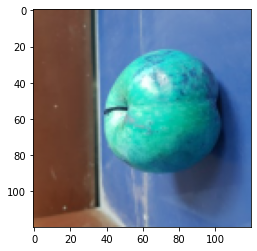

In [6]:
plt.imshow(testX[9])

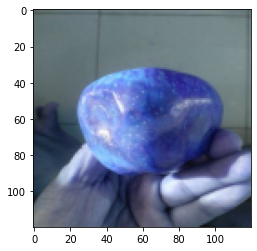

In [7]:
plt.imshow(trainX[700])

### To GrayScale

In [8]:
def grayScale(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    return gray

In [9]:
for i in range(len(testX)):
    testX[i] = grayScale(testX[i])

In [10]:
for i in range(len(trainX)):
    trainX[i] = grayScale(trainX[i])

### Masking

In [11]:
def mask(image):
    
    masking= np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(masking, (60, 60), 50, 255, -1)
    masked = cv2.bitwise_and(image, image, mask=masking)
    
    return masked

In [12]:
for i in range(len(testX)):
    testX[i] = mask(testX[i])

In [13]:
for i in range(len(trainX)):
    trainX[i] = mask(trainX[i])

### Proccessing the image

In [14]:
# convert from integers to floats and normalize to range 0-1
norm_trainX = trainX.astype('float32')/255.0
norm_testX = testX.astype('float32')/255.0

In [15]:
norm_testX.shape

(1200, 120, 120, 3)

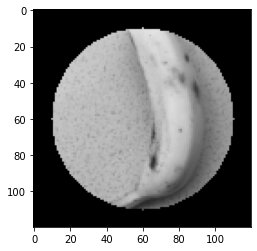

In [16]:
plt.imshow(testX[700])

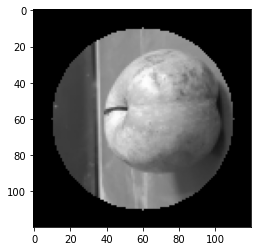

In [17]:
plt.imshow(norm_testX[9])

In [18]:
# one hot encode target values
classes = dict()
i = 0

for index in range(len(testY)):
    if testY[index] not in classes.keys():
        classes[testY[index]] = i
        i+=1
    testY[index] = classes[testY[index]]
    
for index in range(len(trainY)):
    trainY[index] = classes[trainY[index]]

trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [19]:
testY

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [20]:
trainY

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [21]:
trainY.shape

(4800, 3)

# CNN Model

inputs = Input(shape = (128, 128, 3))

conv1 = Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(120, 120, 3))(inputs)

maxP1 = MaxPooling2D(pool_size=2, strides=2)(conv1)

conv2 = Conv2D(filters=32, kernel_size=3, activation='relu')(maxP1)

maxP2 = MaxPooling2D(pool_size=2, strides=2)(conv2)

flattern = Flatten()(maxP2)

dense1 = Dense(units=32, activation='relu')(flattern)

output = Dense(units=3, activation='softmax')(dense1)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(x = norm_trainX, y = trainY, epochs = 10, batch_size=32)

model.save('food_grading')

In [22]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size + (3,))))

cnn.add(MaxPooling2D((2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size + (3,))))

cnn.add(MaxPooling2D((2, 2)))

cnn.add(Flatten())

cnn.add(Dense(units=32, activation='relu')) #hidden layers

cnn.add(Dense(units=3, activation='softmax')) #output layer

# compile model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x=norm_trainX, y=trainY, epochs=10)

Epoch 1/10
150/150 [==============================] - 25s 161ms/step - loss: 1.1752 - accuracy: 0.3673
Epoch 2/10
150/150 [==============================] - 28s 188ms/step - loss: 1.0067 - accuracy: 0.4779
Epoch 3/10
150/150 [==============================] - 27s 178ms/step - loss: 0.9627 - accuracy: 0.4971
Epoch 4/10
150/150 [==============================] - 27s 180ms/step - loss: 0.9211 - accuracy: 0.5170
Epoch 5/10
150/150 [==============================] - 26s 173ms/step - loss: 0.8844 - accuracy: 0.5421
Epoch 6/10
150/150 [==============================] - 27s 182ms/step - loss: 0.8615 - accuracy: 0.5496
Epoch 7/10
150/150 [==============================] - 27s 181ms/step - loss: 0.8327 - accuracy: 0.5658
Epoch 8/10
150/150 [==============================] - 29s 197ms/step - loss: 0.8030 - accuracy: 0.5725
Epoch 9/10
150/150 [==============================] - 28s 188ms/step - loss: 0.7858 - accuracy: 0.6034
Epoch 10/10
150/150 [==============================] - 28s 188ms/step - l

In [23]:
cnn.save('food_grading')

INFO:tensorflow:Assets written to: food_grading\assets


In [24]:
classes

{'Apple': 0, 'Banana': 1, 'Guava': 2}

In [25]:
import numpy as np
from keras.preprocessing import image
print(classes)
d = dict()
for i in classes.keys():
    d[classes[i]] = i
print(d)
def testModel(path):
    
    #Reading the image
    test_image = cv2.imread(path)
    test_image = cv2.resize(test_image, size, interpolation = cv2.INTER_AREA)
    print("Original Image: ")
    plt.imshow(test_image)
    plt.show()
    
    #Scaling
    test_image = cv2.resize(test_image, size, interpolation = cv2.INTER_AREA)
    print("Scaled Image: ")
    plt.imshow(test_image)
    plt.show()
    
    #To grayscale
    test_image = grayScale(test_image)
    print("Grayscale Image: ")
    plt.imshow(test_image)
    plt.show()
    
    #Mask
    test_image = mask(test_image)
    print("Masked Image: ")
    plt.imshow(test_image)
    plt.show()
    
    # Normalize
    test_image = test_image.astype('float32')/255.0
    print("Normalized Image: ")
    plt.imshow(test_image)
    plt.show()
    
    prediction = cnn.predict(np.array([test_image]))
    result = np.argmax(prediction)
    print(result)
    print(d[result])

{'Apple': 0, 'Banana': 1, 'Guava': 2}
{0: 'Apple', 1: 'Banana', 2: 'Guava'}


Original Image: 


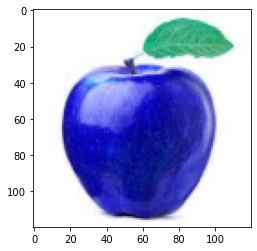

Scaled Image: 


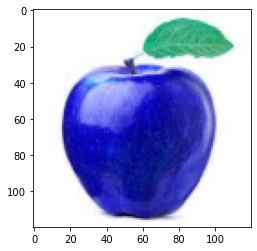

Grayscale Image: 


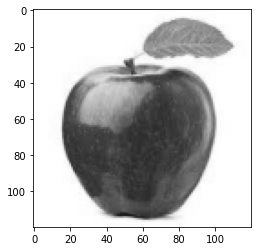

Masked Image: 


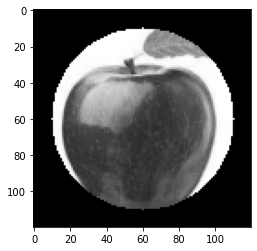

Normalized Image: 


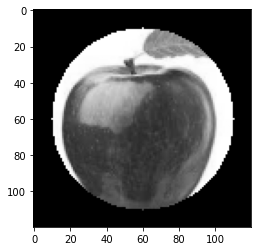

0
Apple


In [26]:
testModel('dataset/single_pred/apple_or_banana1.jfif')

Original Image: 


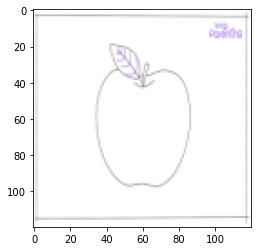

Scaled Image: 


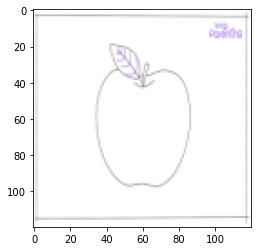

Grayscale Image: 


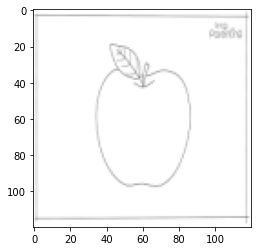

Masked Image: 


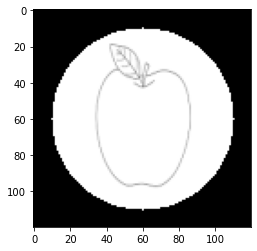

Normalized Image: 


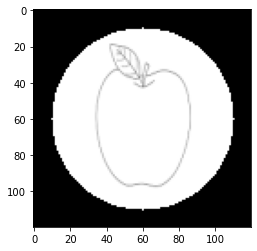

1
Banana


In [27]:
testModel('dataset/single_pred/apple_or_banana2.png')

Original Image: 


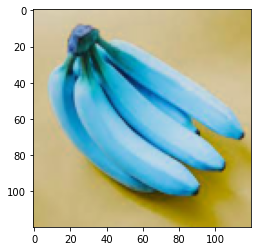

Scaled Image: 


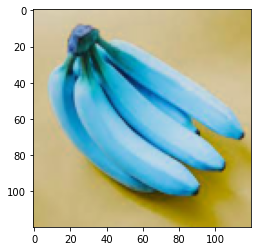

Grayscale Image: 


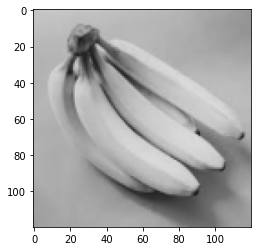

Masked Image: 


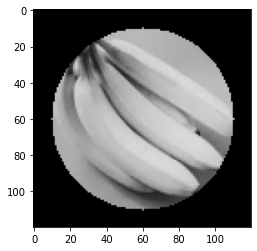

Normalized Image: 


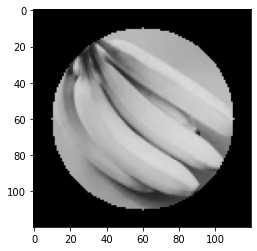

1
Banana


In [28]:
testModel('dataset/single_pred/apple_or_banana3.jfif')

Original Image: 


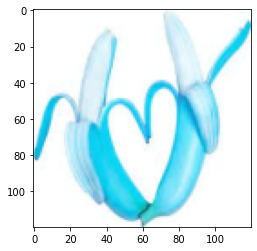

Scaled Image: 


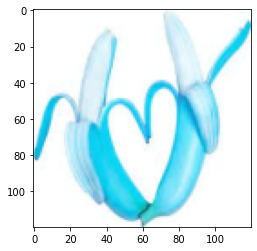

Grayscale Image: 


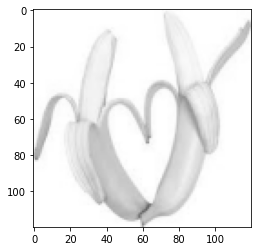

Masked Image: 


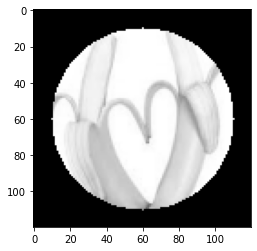

Normalized Image: 


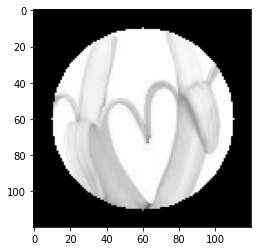

1
Banana


In [29]:
testModel('dataset/single_pred/apple_or_banana4.jfif')

Original Image: 


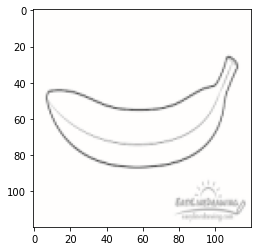

Scaled Image: 


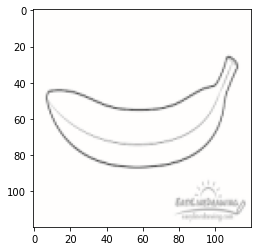

Grayscale Image: 


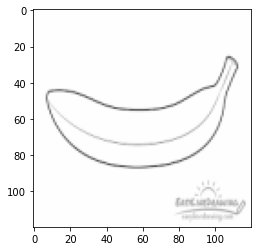

Masked Image: 


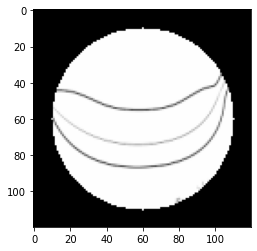

Normalized Image: 


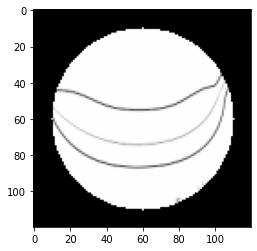

1
Banana


In [30]:
testModel('dataset/single_pred/apple_or_banana5.png')

Original Image: 


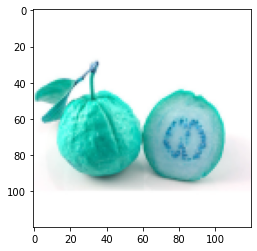

Scaled Image: 


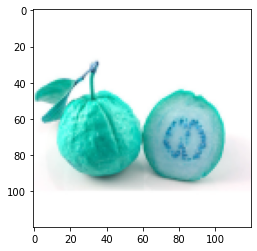

Grayscale Image: 


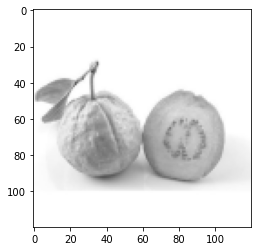

Masked Image: 


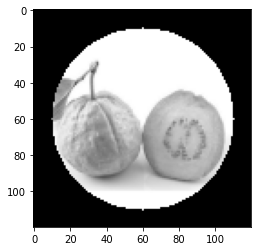

Normalized Image: 


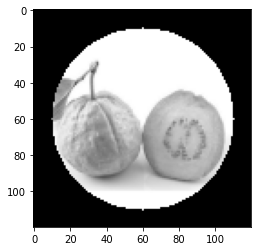

1
Banana


In [31]:
testModel('dataset/single_pred/apple_or_banana6.jpg')

Original Image: 


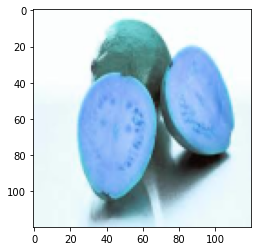

Scaled Image: 


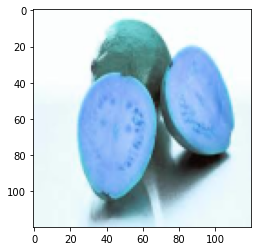

Grayscale Image: 


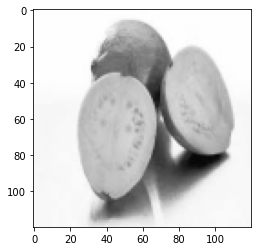

Masked Image: 


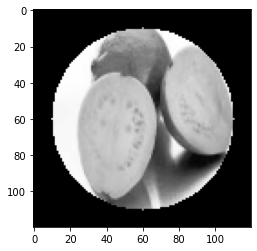

Normalized Image: 


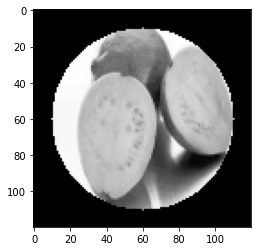

1
Banana


In [32]:
testModel('dataset/single_pred/apple_or_banana7.jfif')

Original Image: 


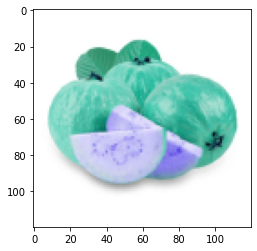

Scaled Image: 


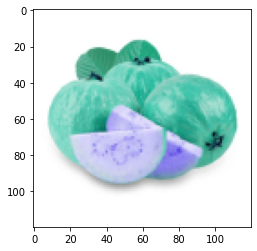

Grayscale Image: 


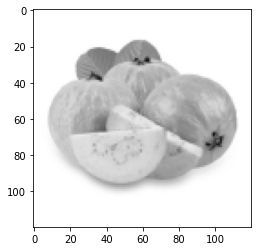

Masked Image: 


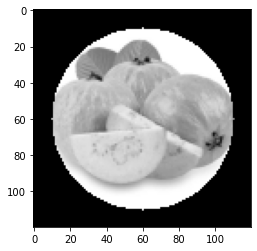

Normalized Image: 


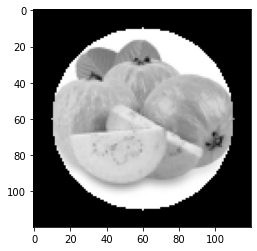

1
Banana


In [33]:
testModel('dataset/single_pred/apple_or_banana8.png')

In [34]:
val_loss, val_acc = cnn.evaluate(norm_testX, testY)

38/38 [==============================] - 2s 57ms/step - loss: 0.8102 - accuracy: 0.5800
